In [1]:
# Import librabies

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Read the data

df = pd.read_csv(r'C:\movies.csv')

df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [2]:
# Data cleaning:

# Check if the table contains any missing data

for col in df.columns:
    data_missing = np.sum(df[col].isnull())
    print('{} - {}'.format(col, data_missing))    

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [3]:
# Remove all the missing values from the table

df = df.dropna()

# Check if the missing values are removed successfully

for col in df.columns:
    data_missing = np.sum(df[col].isnull())
    print('{} - {}'.format(col, data_missing))

name - 0
rating - 0
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0


In [4]:
# Data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Change data type of the columns to integer: votes, budget and runtime

df['votes'] = df['votes'].astype('int64')

df['budget'] = df['budget'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

# Check the columns' data type

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime       int64
dtype: object

In [6]:
# Column year and column country mismatch column released record, so i will split column released into two columns: date2 and column2


# Change data type of column released from object to string

df['released'] = df['released'].astype('str')

# create column date2 and country2

df[['date2', 'country2']] = df['released'].str.split('(', expand = True)

# Strip the right parentheses in column country2

df['country2'] = df['country2'].str.rstrip(')')

# Extract year from column date2 and make it into a new column year2

df['year2'] = df['date2'].str[-5:]

# Check if it is done correctly

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date2,country2,year2
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124,"June 20, 1980",United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98,"July 25, 1980",United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244.0,Columbia Pictures,124,"January 17, 2020",United States,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683.0,Paramount Pictures,99,"February 14, 2020",United States,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753.0,Universal Pictures,101,"January 17, 2020",United States,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497.0,20th Century Studios,100,"February 21, 2020",United States,2020


In [7]:
# Change the data type of column gross from float to integer

df['gross'] = df['gross'].astype('int')

# Sort the data by gross 

df.sort_values(by=['gross'], inplace=False, ascending=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date2,country2,year2
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181,"April 26, 2019",United States,2019
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162,"December 18, 2009",United States,2009
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194,"December 19, 1997",United States,1997
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85,"October 1, 1997",Brazil,1997
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,"March 12, 1982",United States,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,"May 4, 2012",United States,2012
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,"June 12, 2015",United States,2015
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,"July 19, 2019",United States,2019
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",United States,2018


In [8]:
# Check if there is any dupplicate

df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
7648    False
7649    False
7650    False
7651    False
7652    False
Length: 5421, dtype: bool

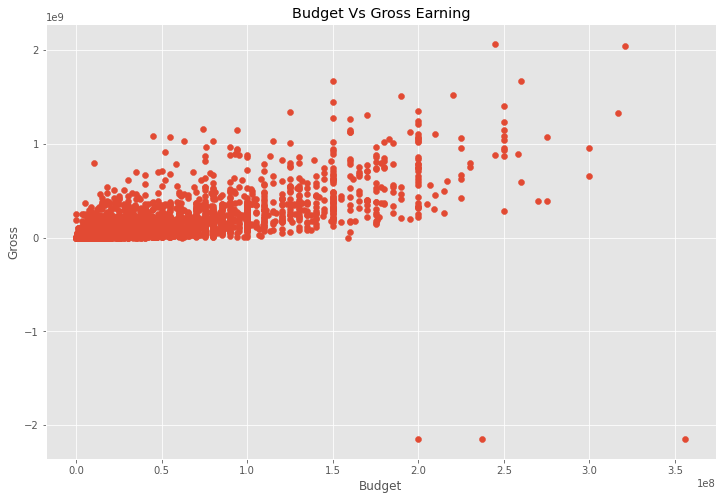

In [9]:
# Assuming Budget has a high correlation with gross
# Build a scatter plot with budget and gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

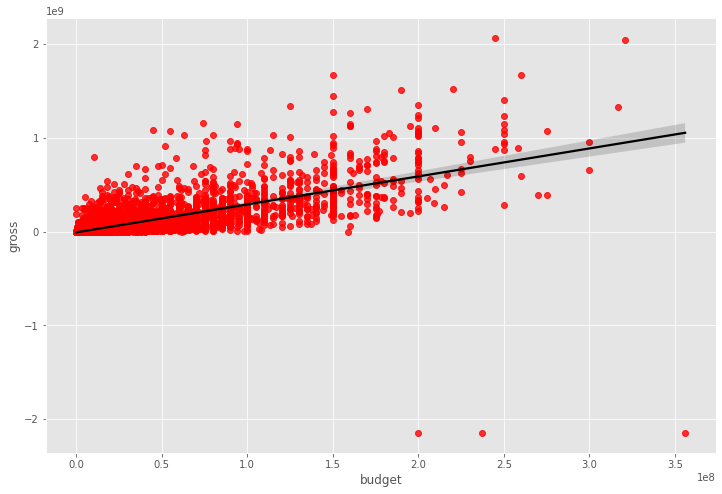

In [10]:
# Plot budget vs gross using seaborn and add a regression line

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color': 'black'})

In [11]:
# Find out the correlations of the data using 3 difference methods(only between numeric data)

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.267631,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.201086,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.550649,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.669203,0.318695
gross,0.267631,0.201086,0.550649,0.669203,1.000000,0.223667
runtime,0.075077,0.414068,0.352303,0.318695,0.223667,1.000000


In [12]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.238737,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.122862,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.551440,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.509844,0.231278
gross,0.238737,0.122862,0.551440,0.509844,1.000000,0.174775
runtime,0.064824,0.292254,0.205344,0.231278,0.174775,1.000000


In [13]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.349858,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.180118,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.742522,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.689669,0.330794
gross,0.349858,0.180118,0.742522,0.689669,1.000000,0.254124
runtime,0.095444,0.412155,0.300621,0.330794,0.254124,1.000000


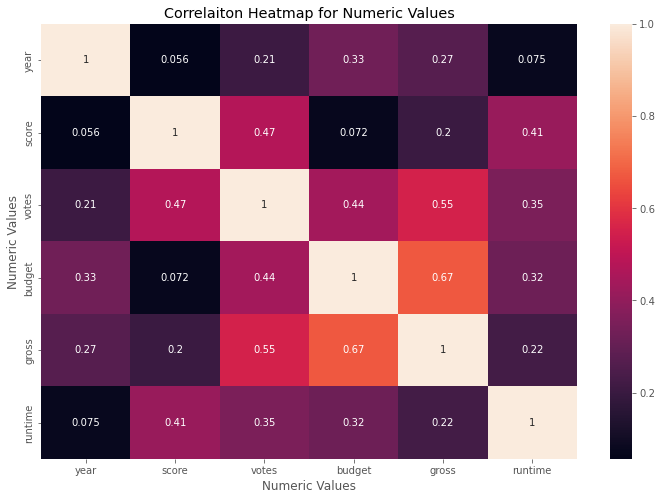

In [14]:
# There is a high correlation between budget and gross

# Make a correaltion heatmap using method pearson
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlaiton Heatmap for Numeric Values')
plt.xlabel('Numeric Values')
plt.ylabel('Numeric Values')

plt.show()

In [15]:
# in order to analyze the correlation between object data, we will make the data type category and assign numbers to the object data
# Turn object data into category data

df_category = df

for col_name in df_category.columns:
    if(df_category[col_name].dtype == 'object'):
        df_category[col_name] = df_category[col_name].astype('category')
        df_category[col_name] = df_category[col_name].cat.codes
        
df_category

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date2,country2,year2
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1239,47,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1065,47,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1288,47,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1065,47,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1108,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124,861,47,40
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99,675,47,40
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101,861,47,40
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100,719,47,40


In [16]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date2,country2,year2
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1239,47,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1065,47,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1288,47,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1065,47,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1108,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124,861,47,40
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99,675,47,40
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101,861,47,40
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100,719,47,40


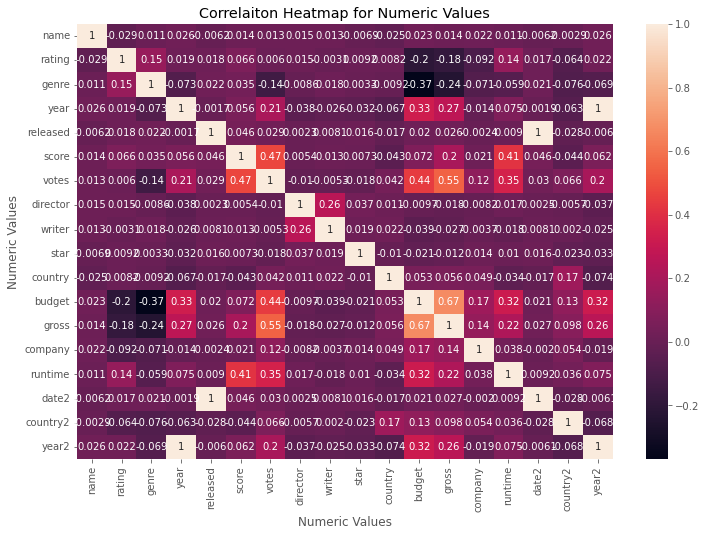

In [17]:
correlation_matrix = df_category.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlaiton Heatmap for Numeric Values')
plt.xlabel('Numeric Values')
plt.ylabel('Numeric Values')

plt.show()

In [18]:
# Unstack the correlation heatmap and show all results

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)

correlation_matrix = df_category.corr()

corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.238629
gross     genre      -0.238629
budget    rating     -0.203946
rating    budget     -0.203946
gross     rating     -0.180805
rating    gross      -0.180805
votes     genre      -0.135990
genre     votes      -0.135990
company   rating     -0.092357
rating    company    -0.092357
country2  genre      -0.075552
genre     country2   -0.075552
year2     country    -0.073569
country   year2      -0.073569
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year2     genre      -0.069147
genre     year2      -0.069147
country2  year2      -0.067536
year2     country2   -0.067536
country   year       -0.066748
year      country    -0.066748
rating    country2   -0.063883
country2  rating     -0.063883
          year       -0.062768
year      country2   -0.062768
genre     runtime    -0.059237
runtime   genre      -0.059237
country2

In [25]:
# Pull the huigh correlation data

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.550649
votes     gross       0.550649
budget    gross       0.669203
gross     budget      0.669203
year2     year        0.998726
year      year2       0.998726
date2     released    0.999951
released  date2       0.999951
name      name        1.000000
date2     date2       1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
country2  country2    1.000000
director  director    1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
writer    writer      1.000000
year2     year2       1.000000
dtype: float64

In [ ]:
# In conclusion, Votes and Budget hve the highest correlation to gross earnings